# Employee Turnover Analysis

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv('HR_comma_sep.csv')

df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [3]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [4]:
df.rename(columns={'sales': 'departments'},inplace = True)

# Visualizing various departments

<Axes: ylabel='departments'>

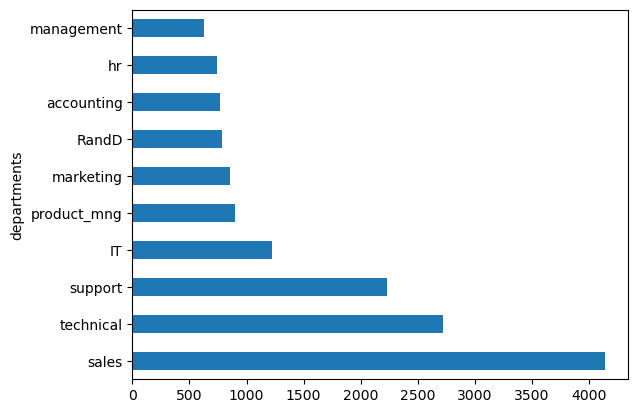

In [5]:
df.departments.value_counts().plot.barh()

# Visual1izing Left vs Employee didnt left

### Based on below bar graph, the number of Employee left is very less compared to Employee didnt left
Hence Data should be balanced with Over sampling techniques such as SMOTE

<Axes: ylabel='left'>

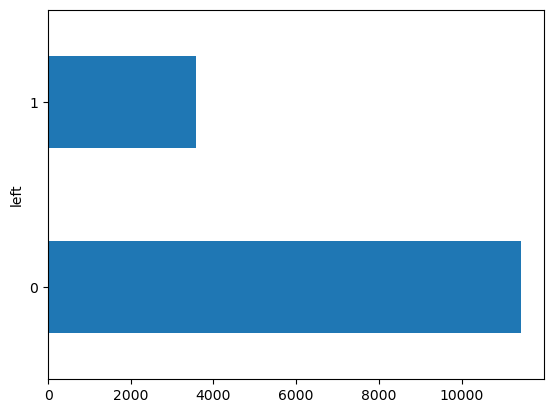

In [6]:
df.left.value_counts().plot.barh()

# Visulizing Salary levels accross Employees
Based on the below plot, Employee with high salary is very less (Only around 1000 Employees)

<Axes: ylabel='salary'>

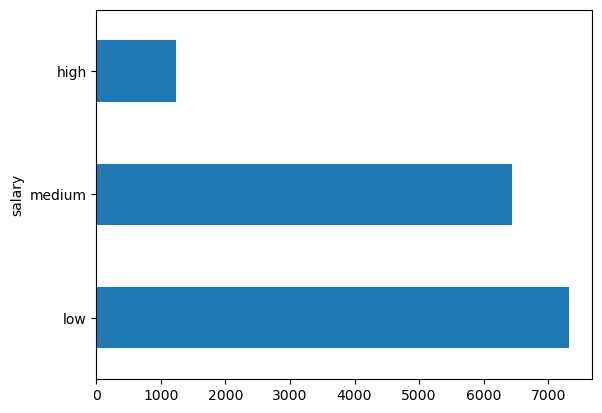

In [7]:
df.salary.value_counts().plot.barh()

# Visualizing the number of projects Employee worked

<Axes: ylabel='number_project'>

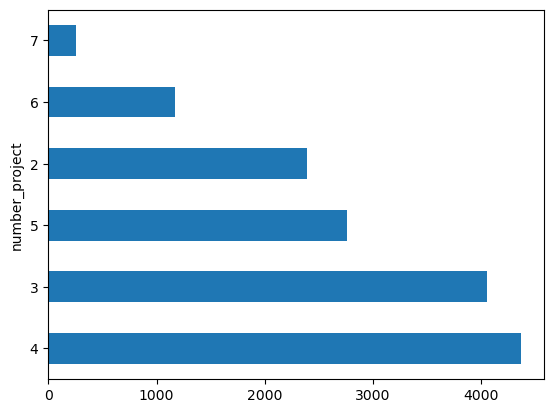

In [8]:
df.number_project.value_counts().plot.barh()

In [9]:
df['salary'].replace({'low': 0 , 'medium': 1, 'high': 2}, inplace = True)

In [10]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()

df['departments_enc'] = enc.fit_transform(df['departments'])

# Creating Co-relation plot of the data

##### Satisfaction level, salary, work accident shows a inverse relationship with left 

<Axes: >

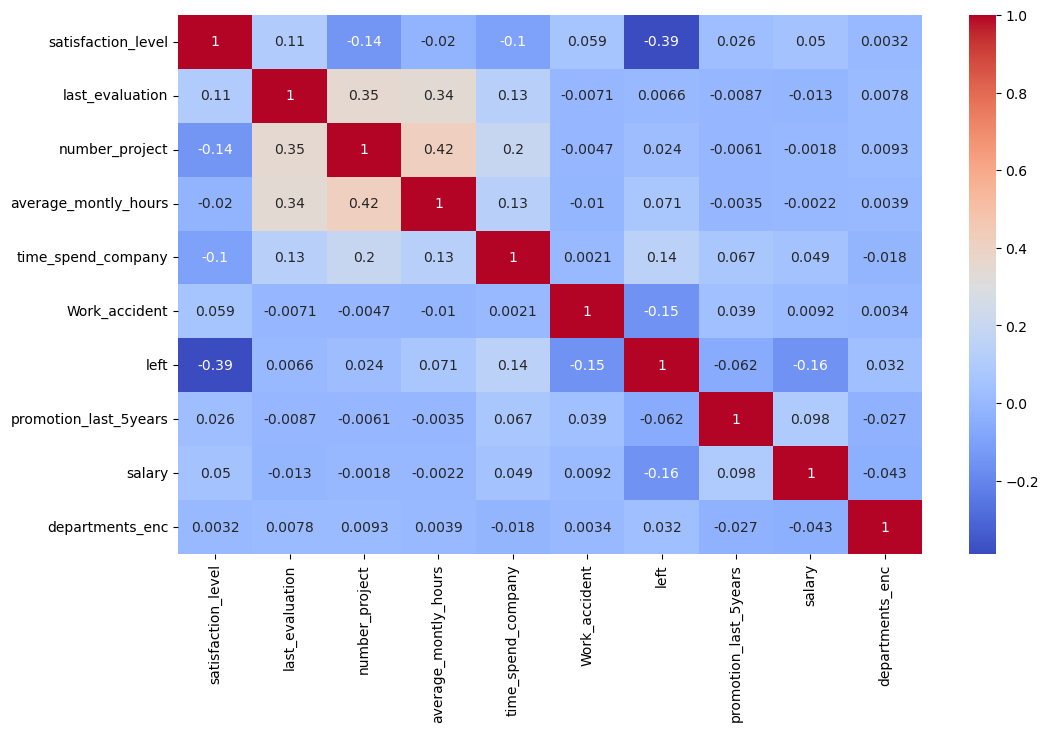

In [11]:
import numpy as np

df.head()

plt.figure(figsize=(12, 7))

cor_data = df.drop(['departments'], axis = 1)

sns.heatmap(cor_data.corr(), annot=True, cmap='coolwarm')

# Visualizing the satisfaction level of Employee left vs Employee stayed

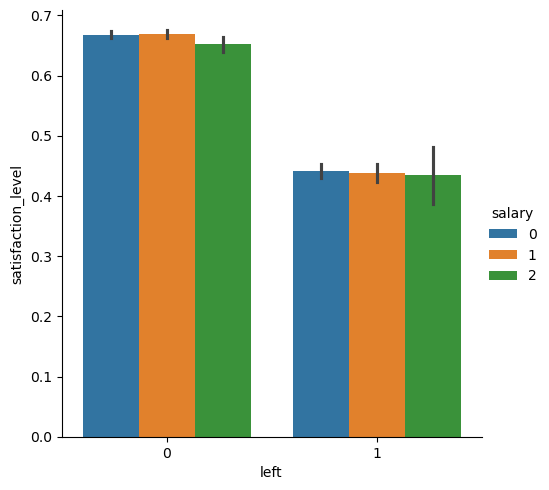

In [12]:
sns.catplot(data = df, y = 'satisfaction_level', x = 'left', kind = 'bar', hue = 'salary', palette='tab10')

# Visualizing the relationship between salary level and people left 

#### Employee left in Support department is higher amoung the low salary level Employees, whereas Employee left in HR dept is higher among the employee with medium and high salary calategory

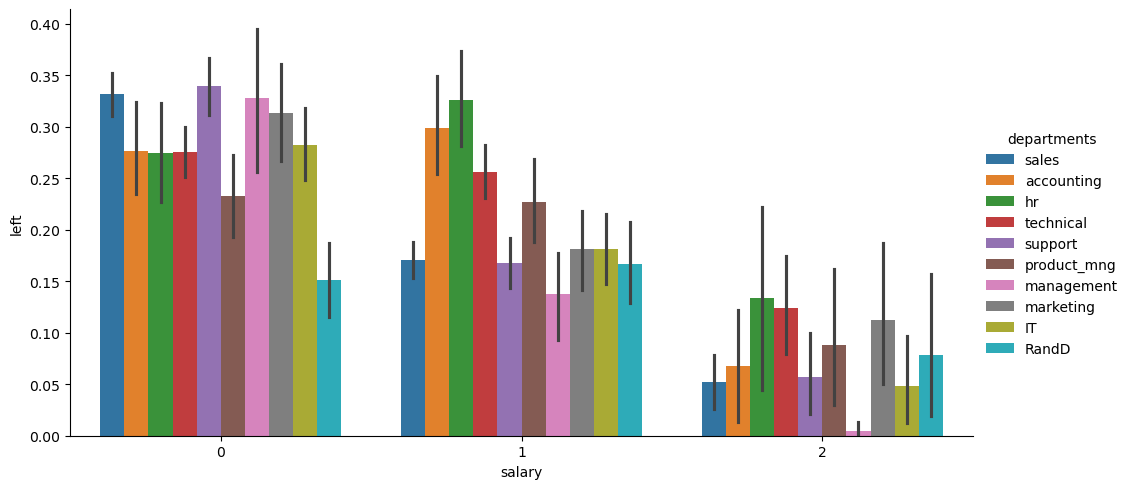

In [13]:
sns.catplot(data = df, x = 'salary', y = 'left', hue = 'departments', kind = 'bar', palette= 'tab10', height = 5, aspect=2)

# Visualizing the realtionship between Employee left and work accident

##### It shows that Employee left with wrok sccident is very less compared with Employees without any work accident, it proves that theres no 5relationship between work accident and Employee left and the workplace is safe for the majorority of the Employees

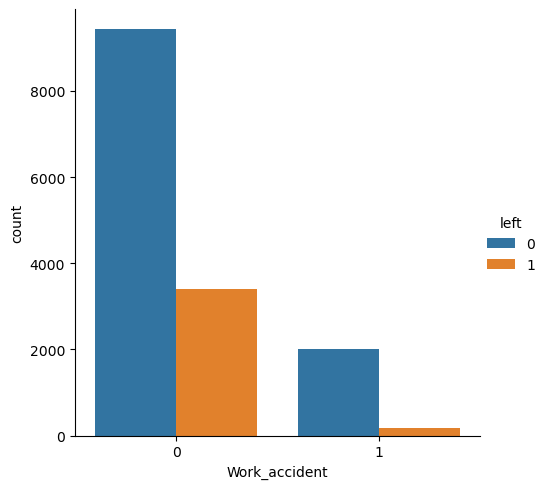

In [14]:
sns.catplot(data = df, hue = 'left', x = 'Work_accident', kind = 'count')

# Lets visualize the count of the Employees working accross various departments

C:\Users\Praveen\AppData\Local\Temp\ipykernel_13116\2601311458.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data = df, x='departments', kind = 'count', palette='tab10', height = 5, aspect=2)


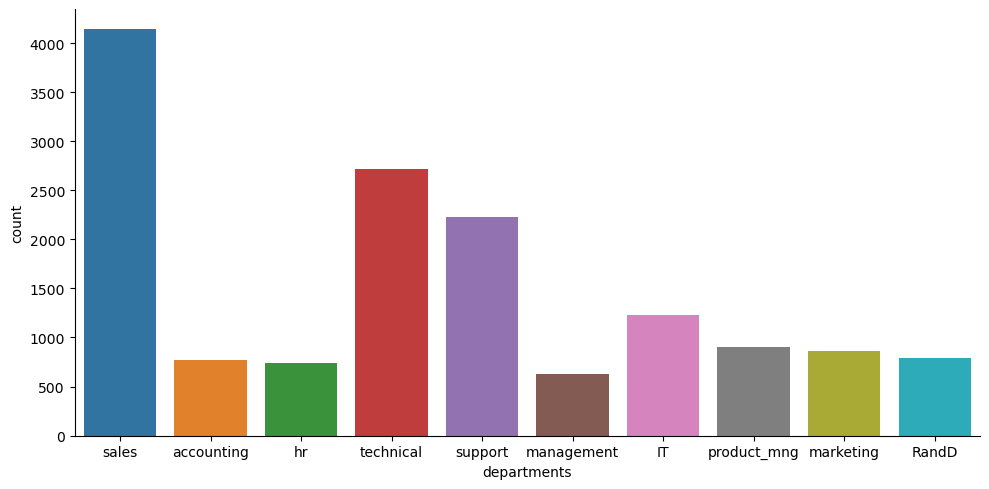

In [15]:
sns.catplot(data = df, x='departments', kind = 'count', palette='tab10', height = 5, aspect=2)

# Visualizing the Employees with high salary accross various departments

#### Employees in management department is getting more salary compared with other department

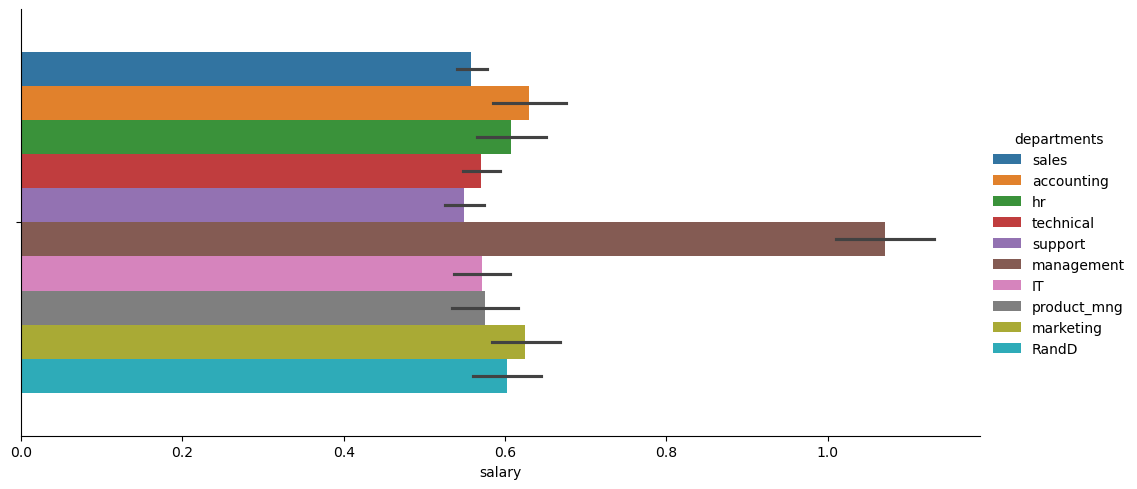

In [16]:
sns.catplot(data = df, x = 'salary', hue='departments', kind = 'bar', palette='tab10', height = 5, aspect=2)

# Visualizing realtionship between Time spent in company and Employee left

#### Employee who spent more hours in company are at more risk of leaving the company

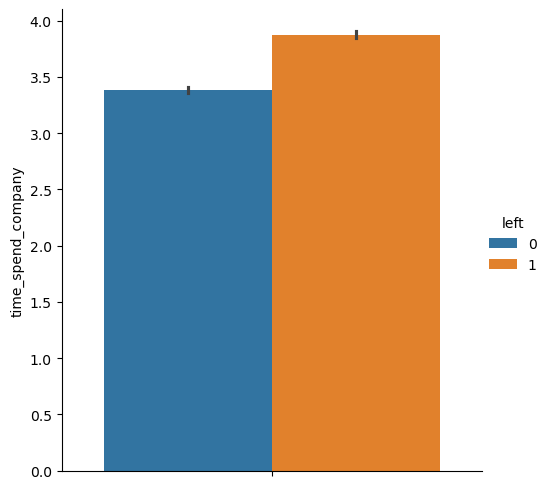

In [17]:
sns.catplot(data = df, hue = 'left', y = 'time_spend_company', kind = 'bar')

# Visualizing realtionship between promotion in last 5 years and Employee left

#### Count of Employee who left received promotion in last 5 years is very less

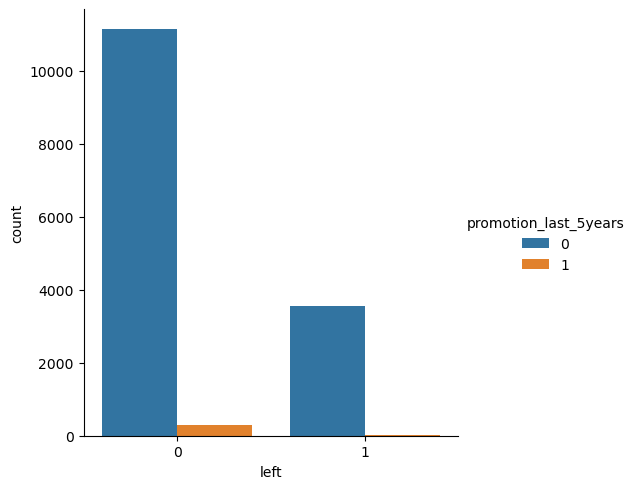

In [18]:
sns.catplot(data = df, x = 'left', hue = 'promotion_last_5years', kind = 'count')

# Draw the distribution plot of:
*	Employee Satisfaction (use column satisfaction_level)
*	Employee Evaluation (use column last_evaluation)
*	Employee Average Monthly Hours (use column average_montly_hours)


<Axes: xlabel='satisfaction_level', ylabel='Count'>

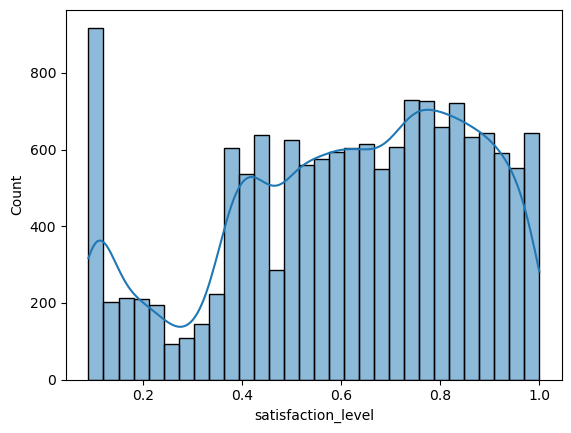

In [19]:
sns.histplot(df.satisfaction_level, kde = True)

<Axes: xlabel='last_evaluation', ylabel='Count'>

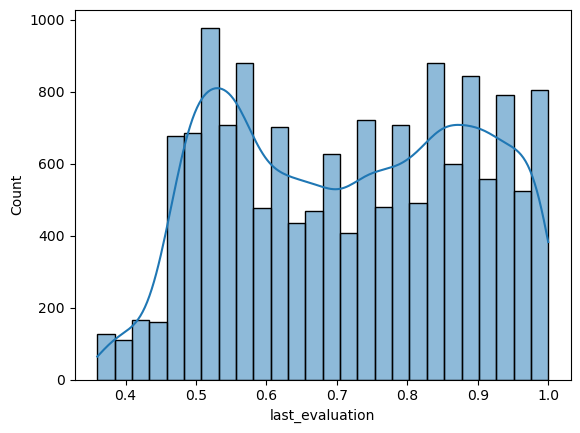

In [20]:
sns.histplot(df.last_evaluation, kde = True)

<Axes: xlabel='average_montly_hours', ylabel='Count'>

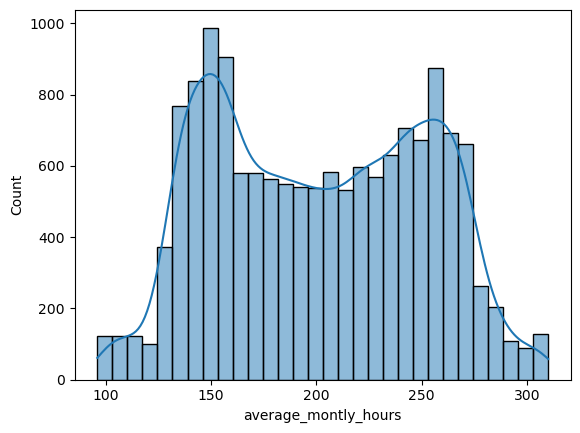

In [22]:
sns.histplot(df.average_montly_hours, kde = True)

# Bar plot of the employee project count of both employees who left and stayed in the organization

#### Employees with only 2 projects count and Employees with more than 5 projects count left the company in higher rate and Employee with 3 or 4 Project count have comparitively less turnover rate

Text(0.5, 1.0, 'Employee Project count by Turnover')

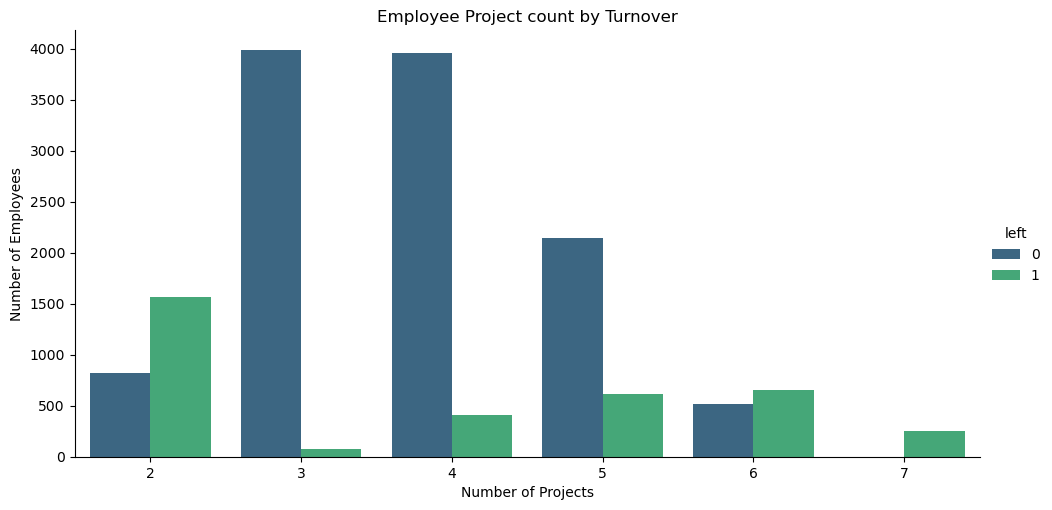

In [21]:
sns.catplot(data = df, x = 'number_project', kind = 'count', hue = 'left', palette='viridis', height = 5, aspect = 2)
plt.xlabel('Number of Projects')
plt.ylabel('Number of Employees')
plt.title("Employee Project count by Turnover")

Possible Inferences:¶
High Project Count and Turnover:
* Employees with a very high number of projects (e.g., 6 or 7) have a higher turnover rate. This might suggest that employees with an excessive workload are more likely to leave the organization.

* Low to Moderate Project Count and Retention:
Employees with a moderate number of projects (e.g., 3 to 5) tend to have lower turnover rates. This might indicate that a balanced workload is associated with better employee retention.

* Very Low Project Count and Turnover:
There might be a higher turnover rate for employees with very few projects (e.g., 2 projects). This could suggest that underutilization or lack of engagement might also contribute to higher turnover.

* Optimal Project Count:
The plot might show that a specific range of project counts (e.g., 3 to 5) has the lowest turnover rate, indicating an optimal workload for employee satisfaction and retention.

These inferences can guide HR strategies to manage employee workload better, aiming to optimize employee satisfaction and retention.

In [22]:
from sklearn.cluster import KMeans

cluster = KMeans(n_clusters=3)

left = df[df['left'] == 1]

X = left[['satisfaction_level', 'last_evaluation']]

left['cls'] = cluster.fit_predict(X)

C:\Users\Praveen\AppData\Local\Temp\ipykernel_13116\4221683357.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  left['cls'] = cluster.fit_predict(X)


<Axes: xlabel='satisfaction_level', ylabel='last_evaluation'>

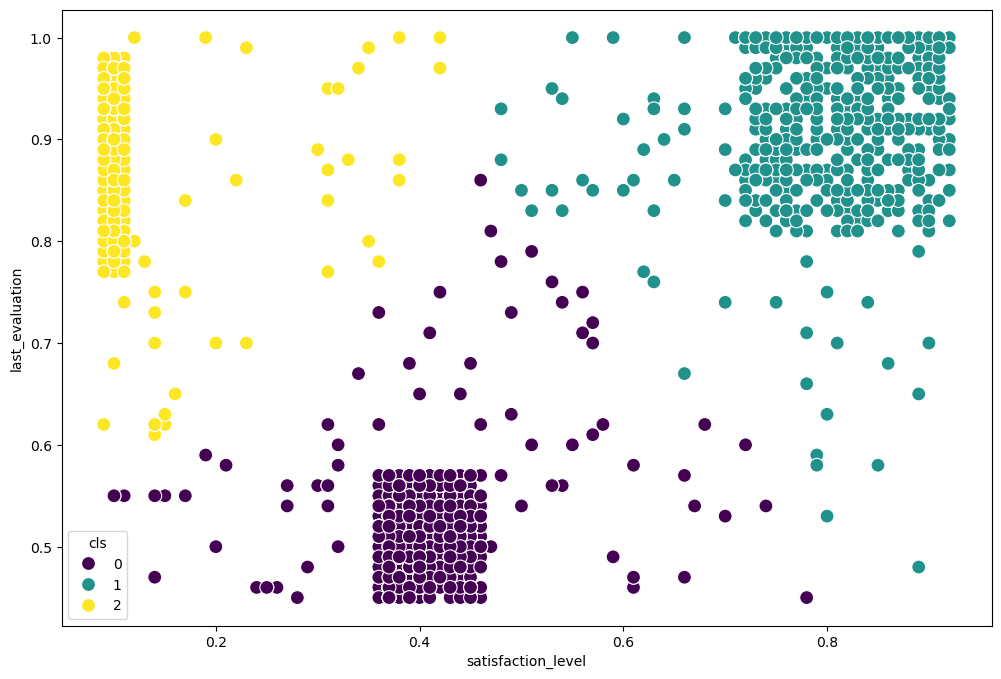

In [25]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data = left, x = 'satisfaction_level', y = 'last_evaluation', hue = 'cls', palette='viridis', s = 100)

# Cluster analysis
### From above K-means Clustering of Employees Who Left we got three clusters
# Cluster 0: Low Satisfaction, Low Evaluation
# Characteristics:
* Low Satisfaction Level: Employees in this cluster are generally dissatisfied with their jobs.
* Low Last Evaluation: They also have low performance evaluations.
* Possible Reasons for Leaving:
* Dissatisfaction with job role or environment.
* Poor performance feedback leading to demotivation.

# Retention Strategies:
* Improve workplace conditions and job roles.
* Provide clear and constructive feedback.
* Implement employee engagement programs to address dissatisfaction.
# Cluster 1: High Satisfaction, High Evaluation
# Characteristics:
* High Satisfaction Level: Employees in this cluster are satisfied with their jobs.
* High Last Evaluation: They have high performance evaluations.
* Possible Reasons for Leaving:
* Seeking better opportunities elsewhere despite being satisfied.
* Lack of growth opportunities or recognition within the company.
  
# Retention Strategies:
* Offer career development programs and growth opportunities.
* Recognize and reward top performers to retain them.
* Conduct stay interviews to understand their future aspirations and address concerns.
# Cluster 2: Moderate Satisfaction, Moderate Evaluation
# Characteristics:
* Moderate Satisfaction Level: Employees in this cluster have average satisfaction.
* Moderate Last Evaluation: They receive average performance evaluations. # Possible Reasons for Leaving:
* They might feel they are not progressing or being challenged enough.
* External job offers with better prospects.
# Retention Strategies:
* Engage these employees to understand their concerns and aspirations.
* Provide professional development and training programs.
* Enhance job roles to make them more challenging and fulfilling.

# Data Pre Processing

In [26]:
df = pd.get_dummies(df, columns=['departments', 'salary'], drop_first=True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   satisfaction_level       14999 non-null  float64
 1   last_evaluation          14999 non-null  float64
 2   number_project           14999 non-null  int64  
 3   average_montly_hours     14999 non-null  int64  
 4   time_spend_company       14999 non-null  int64  
 5   Work_accident            14999 non-null  int64  
 6   left                     14999 non-null  int64  
 7   promotion_last_5years    14999 non-null  int64  
 8   departments_enc          14999 non-null  int32  
 9   departments_RandD        14999 non-null  bool   
 10  departments_accounting   14999 non-null  bool   
 11  departments_hr           14999 non-null  bool   
 12  departments_management   14999 non-null  bool   
 13  departments_marketing    14999 non-null  bool   
 14  departments_product_mn

In [28]:
df.isnull().sum()

satisfaction_level         0
last_evaluation            0
number_project             0
average_montly_hours       0
time_spend_company         0
Work_accident              0
left                       0
promotion_last_5years      0
departments_enc            0
departments_RandD          0
departments_accounting     0
departments_hr             0
departments_management     0
departments_marketing      0
departments_product_mng    0
departments_sales          0
departments_support        0
departments_technical      0
salary_1                   0
salary_2                   0
dtype: int64

# Train Test Split

In [29]:
from sklearn.model_selection import train_test_split

X = df.drop('left', axis=1)
y = df['left']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size= 0.2)

# SMOTE uplscaling

In [30]:
from imblearn.over_sampling import SMOTE

ups = SMOTE(random_state=42)

X_train_up, y_train_up = ups.fit_resample(X_train, y_train)

<Axes: ylabel='left'>

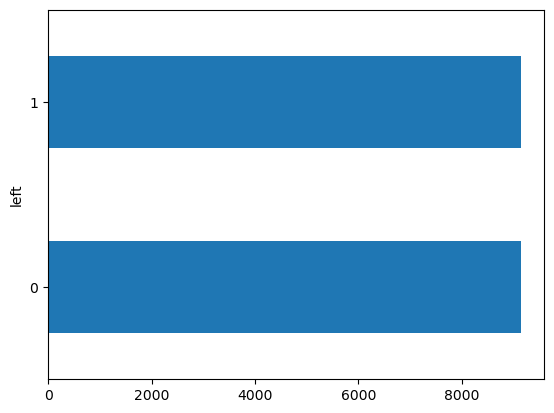

In [31]:
y_train_up.value_counts().plot.barh()

# Finding best model for the Employee dataset

In [168]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, classification_report


# Define the models
models = {
    'Logistic Regression': LogisticRegression(max_iter=2000),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Decision Trees': DecisionTreeClassifier(random_state=42)
}

# Train the models and make predictions
predictions = {}
probs = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    predictions[model_name] = model.predict(X_test)
    probs[model_name] = model.predict_proba(X_test)[:, 1]

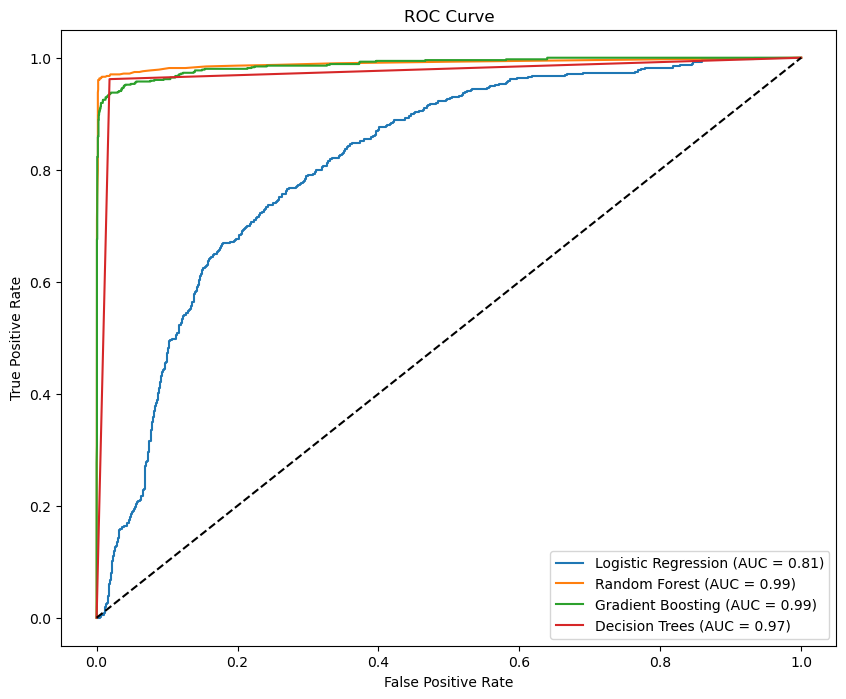

In [169]:
plt.figure(figsize=(10, 8))

for model_name in models:
    fpr, tpr, _ = roc_curve(y_test, probs[model_name])
    auc = roc_auc_score(y_test, probs[model_name])
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### Based on the above accyracy score, Random Forest model gives the best accuracy score of 99%

# Confusion Matrix

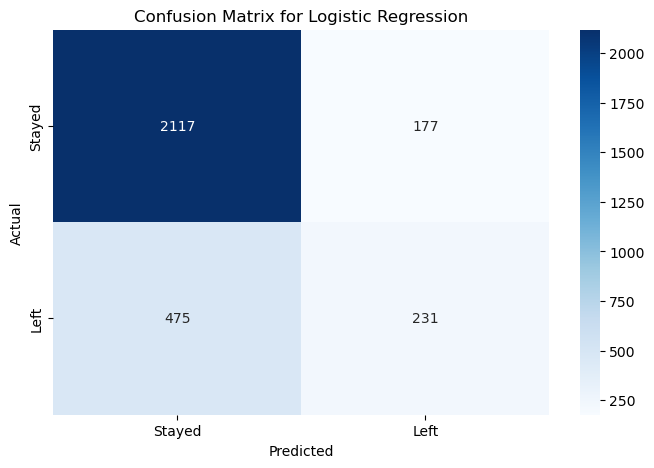

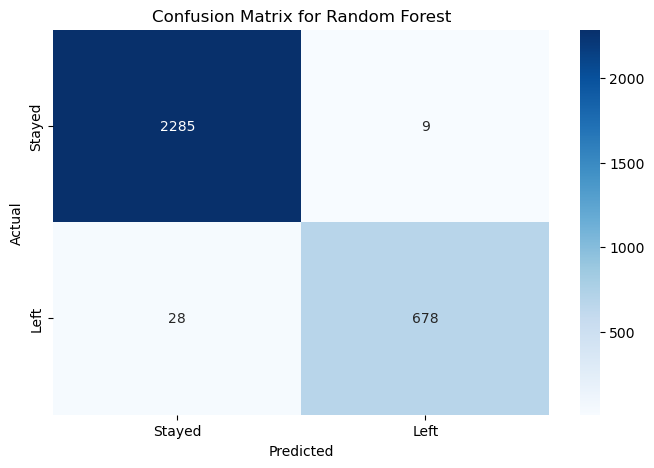

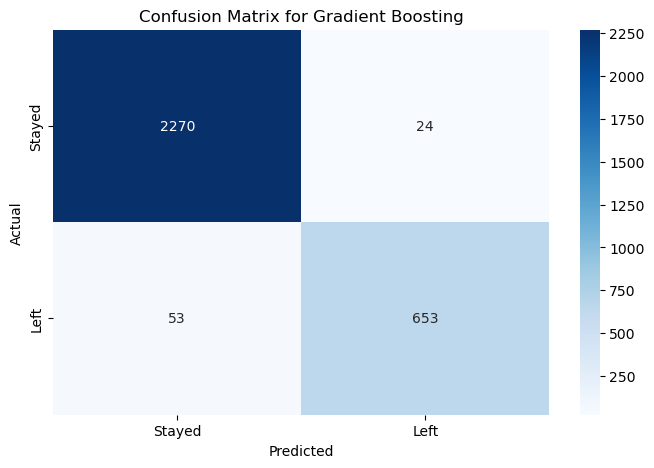

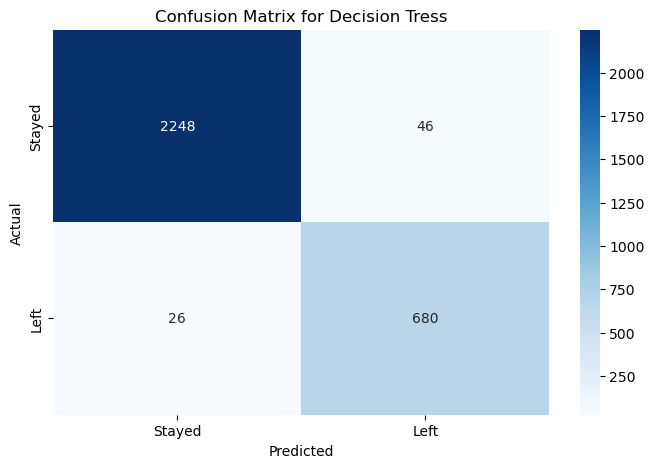

In [112]:
for model in models:
    cm = confusion_matrix(y_test, predictions[model])
    plt.figure(figsize=(8, 5))
    sns.heatmap(cm, annot = True, cmap = 'Blues', fmt = 'd', xticklabels=['Stayed', 'Left'], yticklabels=['Stayed', 'Left'])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix for {model}")

# Classification report

In [107]:
for model_name in models:
    print(f'Classification Report for {model_name}:\n')
    print(classification_report(y_test, predictions[model_name]))
    roc_auc = roc_auc_score(y_test, probs[model_name])
    print(f'ROC AUC for {model_name}: {roc_auc:.2f}\n')

Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      2294
           1       0.57      0.33      0.41       706

    accuracy                           0.78      3000
   macro avg       0.69      0.63      0.64      3000
weighted avg       0.76      0.78      0.76      3000

ROC AUC for Logistic Regression: 0.81

Classification Report for Random Forest:

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2294
           1       0.99      0.96      0.97       706

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000

ROC AUC for Random Forest: 0.99

Classification Report for Gradient Boosting:

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2294
           1       0.96      

# Precision or Recall?

### For the Employee turnover analysis problem, recall is more critical then Precision

False Negative (FN) prediction of a Employee who are at a high risk of leaving the company is more critical as it causes a potiential loss of lossing highly skilled Employees

Hence Random forest model is selected as a best model for its high Recall score

In [163]:
best_model = models['Random Forest']

y_test_prob = best_model.predict_proba(X_test)[:,1]
df_test = X_test.copy()
df_test['left_prob'] = y_test_prob

In [164]:
def retention_strategy(prob):
    if prob < 0.20:
        return 'Safe Zone (Green)'
    elif prob < 0.60:
        return 'Low-Risk Zone (Yellow)'
    elif prob < 0.90:
        return 'Medium-Risk Zone (Orange)'
    else:
        return 'High-Risk Zone (Red)'

df_test['retention_zone'] = df_test['left_prob'].apply(retention_strategy)

In [165]:
zone_counts = df_test.retention_zone.value_counts()

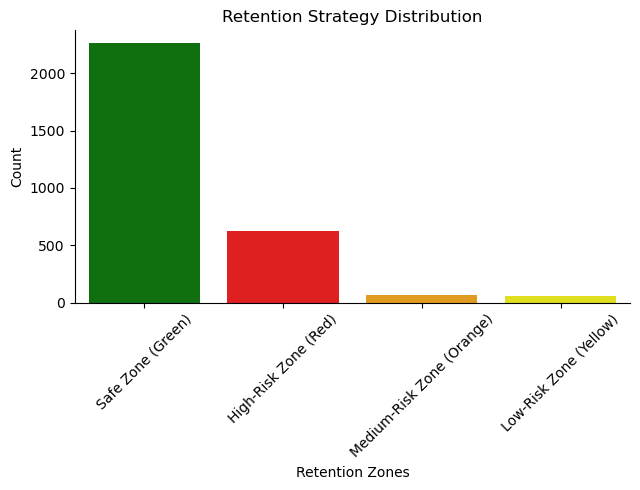

In [166]:
custom_palette = {
    "Safe Zone (Green)": "green",  # Blue
    "Medium-Risk Zone (Orange)": "orange",   # Orange
    "High-Risk Zone (Red)": "red",
    "Low-Risk Zone (Yellow)": "yellow"

}

sns.catplot(data = df_test, x = 'retention_zone', kind = 'count', hue = 'retention_zone', palette=custom_palette , height = 5, aspect = 1.3)
plt.title('Retention Strategy Distribution')
plt.xlabel('Retention Zones')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### In the above plot, the Employees who are at the risk of leaving the company are categorized based on their prediction score. The graph can be used by HR department to plan various retension stratergies to retain the valuable Employees who are at the risk scale of leaving thr company